### A quick demonstration of computing analytic B-mode spectrum from convolution of E and phi

In [1]:
import numpy as np
import basic
import cmb
from matplotlib.pyplot import *

In [10]:
# define parameters
Tcmb = 2.726e6    # CMB temperature
lmax = 4000       # maximum multipole of output cl
l = np.linspace(0,lmax,lmax+1)
dlmin = 2
dlmax = 4000

In [11]:
# load unlensed and lensed Cls
ucl = cmb.read_camb_cls('../data/unlensedcls.dat',ftype='scal',output='array')[:,:lmax+1]
lcl = cmb.read_camb_cls('../data/lensedcls.dat',ftype='lens',output='array')[:,:lmax+1]

Compute delensed BB

In [12]:
# E-mode power spectrum
EE = ucl[1,:]
# Lensing potential power spectrum
pp = ucl[3,:]
# Wiener filter (no noise)
WE = np.ones(dlmax+1)
Wp = np.ones(dlmax+1)

In [13]:
bb = basic.delens.lintemplate(lmax,dlmin,dlmax,dlmin,dlmax,EE[:dlmax+1],pp[:dlmax+1],WE,Wp)

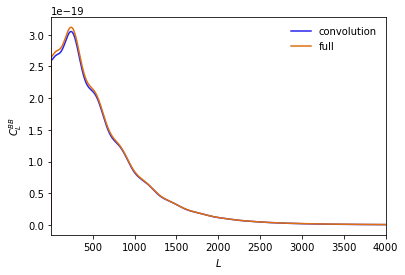

In [14]:
xlim(2,lmax)
xlabel('$L$')
ylabel('$C_L^{BB}$')
plot(l,bb,label='convolution')
plot(l,lcl[2,:],label='full')
legend()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


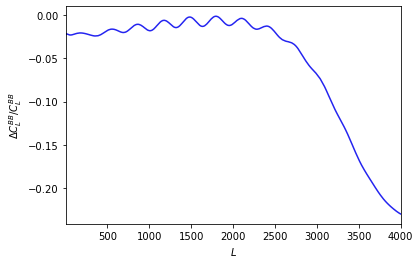

In [16]:
xlim(2,lmax)
xlabel('$L$')
ylabel('$\Delta C_L^{BB}/C_L^{BB}$')
plot(l,bb/lcl[2,:]-1)

In [7]:
# save to a file if necessary
#np.savetxt('test.dat',np.array((l,bb).T)